In [5]:
#necessary imports
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy import stats
import statistics

plt.style.use('untitled1.txt')

# Objective

In this part, we are studying the effect of a half-wave plate (1/2 WP) on a linearly polarised beam.

# Experimental method

## Experimental set-up

We use the same apparatus, adding the half waveplate (1/2 WP) between the polariser and the analyser, such that we have linearly polarised light incident on the 1/2 WP, and we can study the SOP which comes out of the 1/2 WP by rotating the analyser. Note that this 1/2 WP only works for our laser ($633 \ \mathrm{nm}$) because of how it is constructed to introduce a phase offset of $\pi$ between the slow and fast axes.

We first want to align the 1/2 WP so that the transmission axes of the 3 components are aligned, which we did by finding the maximum transmission when the analyser and the polariser are both at 0&deg;, and changing the scale of the 1/2 WP so that this corresponds to 0&deg; for the analyser too. This is different from the method used previously (where we used the minimum transmission to set up), because the minimum transmission is 45&deg; for the 1/2 WP, which falls between graduations, making the calibration less precise. I'll perhaps find a better method later on.

## Measurements

The Background was 5 counts for this part.

We first want to find the two transmission axes of the 1/2 WP, so we fix the polariser and the analyser ar 0&deg;, and rotate the 1/2 WP to find the minimum and maximum transmission angles.

**max transmission** at 0&deg; (914 counts), 90&deg; (902 counts), 180&deg; (906 counts), 270&deg; (916 counts)

**min transmission** at 45&deg; (4 counts), 135&deg; (5 counts), 225&deg; (5 counts), 315&deg; (4 counts).

These were not background subtracted.

We deduce that the two transmission axes are at 90&deg; from each other. Now if we average the power out in the first axis (0 and 180&deg;), and also calculate the standard error on the mean using the scipy function `scipy.stats.sem`, and do the same for the second axis, we find

In [6]:
#calculating the power averages for each axes
one_av  = np.average([914-5, 906-5]) #first axis, background subtracted
two_av  = np.average([902-5, 916-5]) #second axis, background subtracted

#calculating the standard error on the mean for these
one_ave = stats.sem([914-5, 906-5])  #first axis
two_ave = stats.sem([902-5, 916-5])  #second axis

print('the average power output in the first axis is {0:.0f} pm {1:.0f} counts'.format(one_av, one_ave))
print('the average power output in the second axis is {0:.0f} pm {1:.0f} counts'.format(two_av, two_ave))

the average power output in the first axis is 905 pm 4 counts
the average power output in the second axis is 904 pm 7 counts


Clearly here, the ratio between the two maximum output powers is one, especially when we take into account the errors. This means the two axes transmit the same amout of light.

Now, to find the effect of the 1/2 WP on the initial SOP, we find the minimum and maximum transmissions for a range of 1/2 WP angles by rotating the analyser around 360&deg;.

Note these are not background subtracted.

**Table 1**: Measurements of the max and min transmission for different 1/2 WP angles

1/2 WP angle (&deg;) | analyser angles for max transmission (&deg;) | max power in the same order (counts) | analyser angles for min transmission (&deg;) | min power in the same order (counts)
:-:|:---------:|:--------:|:--------:|:-----:
0  | 0,   180  | 915, 914 | 90,  270 | 5, 5
10 | 20,  200  | 914, 914 | 110, 290 | 6, 5
30 | 60,  240  | 914, 913 | 150, 330 | 4, 5
45 | 90,  270  | 910, 916 | 0,   180 | 5, 6
60 | 120, 300  | 905, 912 | 30,  210 | 5, 6
80 | 160, 340  | 904, 912 | 70,  250 | 5, 6
90 | 0,   180  | 910, 904 | 90,  270 | 5, 7

The angle of the analyser when the transmission is maximal is the angle of the SOP incident on the analyser (which is the whole point of the analyser, and comes from Malus' law). As the SOP incident to the 1/2 WP is at 0&deg;, we conclude that the 1/2 WP must make the polarisation rotate by twice its angle (ie the angle between the first transmission axis and the SOP). This is equivalent to saying that the incoming SOP is reflected with respect to the transmission axis. For example, for a 10 &deg; angle of the 1/2 WP, we get a final SOP of 20 &deg;. Further, from the 1st and last line of the table (1/2 WP angle of 0 and 90 &deg;), we see that, as the two transmission axes have the same power output, we get the same results.


NOTE that the power output is lower at max transmission than the measurements we had earlier because of the absorption of the WP.

Finally, we take measurements for the power output of a range of 1/2 WP angle, setting analyser and polariser at 0&deg; to study the 1/2 WP's relation to Malus' law.

These are also not background subtracted.

**Table 2**: Power output along the x-axis for a range of 1/2 WP angles

1/2 WP angle (&deg;) | output power 1 | output power 2
:--:|:---:|:---:
0   | 919 | 918
20  | 533 | 530
45  | 6   | 6
60  | 236 | 241
80  | 804 | 806
90  | 911 | 906
100 | 795 | 793
120 | 211 | 216
135 | 7   | 6
140 | 40  | 44
160 | 566 | 561
180 | 911 | 911

# Data analysis

Here, we use the exact same code as we did in the previous section.

First, we read the data:

In [7]:
#load the data

angle, power1, power2=np.loadtxt('Measurements_paragraph_3.csv', delimiter=',', skiprows=4, unpack='True')  

background=5                    #background value
reading_error=1                 #error on each value of count
angle_err=np.ones_like(angle)   #reading error on angle is one

Then we find the average for each angle, as well as the standard error.

In [8]:
#find out the standard error and mean of the measurements
power_err=[]                                   #create array for standard error
power_mean=[]                                  #create array for the mean 

for i in range (0,12):                     
    mea=[power1[i],power2[i]]                  #array of the i-th element in all the counts arrays
    mea=mea-np.ones_like(mea)*background       #subtracting array by array of background
    average=statistics.mean(mea)               #find the average of each iteration
    ste=sem(mea)                               #find the standard error of each iteration
    
    print('the average power at angle {0} is then {1:.1f} pm {2:.1f}'.format(i+1, average, ste))

    power_mean.append(average)                 #append the calculated average value to corresponding array
    power_err.append(ste)                      #append the calculated standard error to corresponding array

the average power at angle 1 is then 913.5 pm 0.5
the average power at angle 2 is then 526.5 pm 1.5
the average power at angle 3 is then 1.0 pm 0.0
the average power at angle 4 is then 233.5 pm 2.5
the average power at angle 5 is then 800.0 pm 1.0
the average power at angle 6 is then 903.5 pm 2.5
the average power at angle 7 is then 789.0 pm 1.0
the average power at angle 8 is then 208.5 pm 2.5
the average power at angle 9 is then 1.5 pm 0.5
the average power at angle 10 is then 37.0 pm 2.0
the average power at angle 11 is then 558.5 pm 2.5
the average power at angle 12 is then 906.0 pm 0.0


There are some errors here which are equal to 0, which they really shouldn't, which in part comes from the fact that we made a limited number of measurements, and that we have a reading error (ie our measurements can't go beyond a certain precision). We'll see if this skews our results later on.

We then need normalise the data and plot, like so:

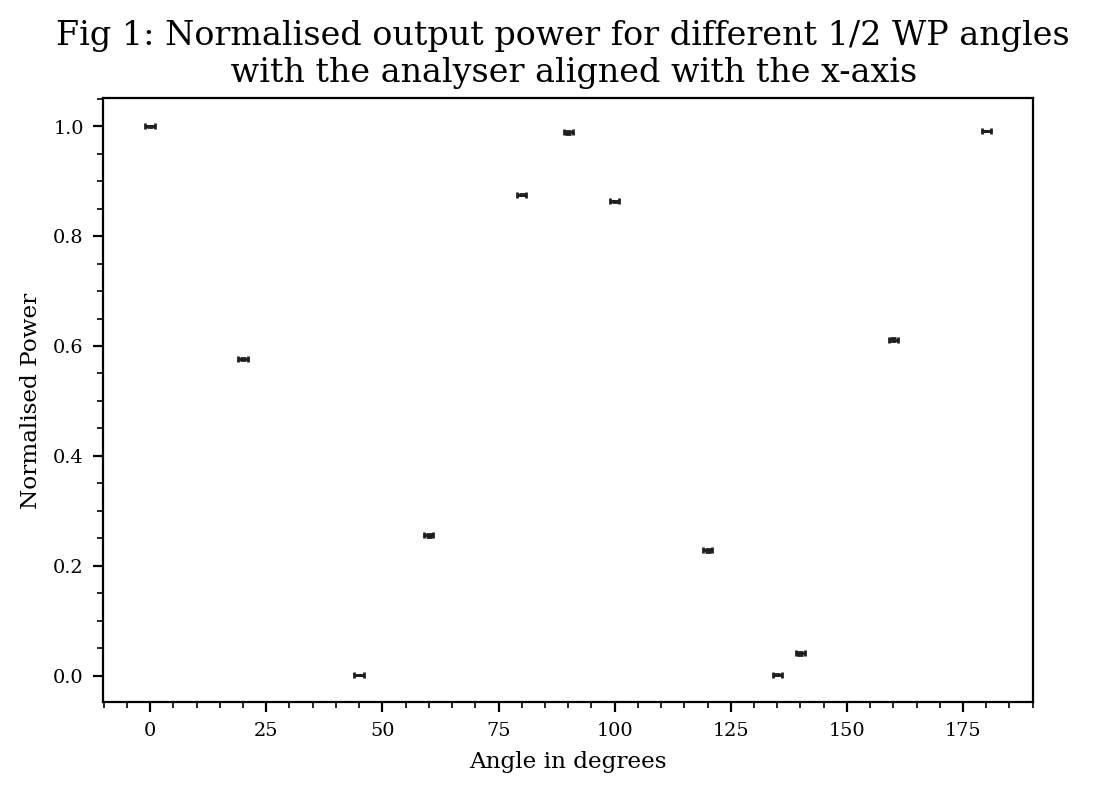

In [10]:
# Want to normalise data, so divide by counts by maximum:

max_power  = max(power_mean)                # naming the maximum number of counts
max_index   = power_mean.index(max_power)   # finding its index
max_error   = power_err[max_index]          # naming the error associated with the maximum, which has the same index

norm_power = power_mean/max_power           #normalising

# calculating error on normalised counts by error propagation

norm_error = [(norm_power[i] * np.sqrt((power_err[i]/power_mean[i])**2+(max_error/max_power)**2)) for i in range(np.size(power_mean))]
    # ^ using list comprehension here

    
#plotting
plt.errorbar(angle, norm_power, yerr=norm_error, xerr=angle_err, fmt='none')      #plot number of counts against angles
plt.xlabel('Angle in degrees')                                                    #label x-axis
plt.ylabel('Normalised Power')                                                    #label y-axis
plt.title('Fig 1: Normalised output power for different 1/2 WP angles \n with the analyser aligned with the x-axis')
plt.show()

Fig 1 looks like a $\cos^2$ function which has a period of $\pi/2$. We can verify this by fitting a $\cos^2$ function in exactly the same way as the previous section.

fit function is then y = 0.992 pm 0.002 * cos^2 ((2.010 pm 0.005) * x + (-0.1 pm 0.5)) + (0.00105 pm 7e-05)


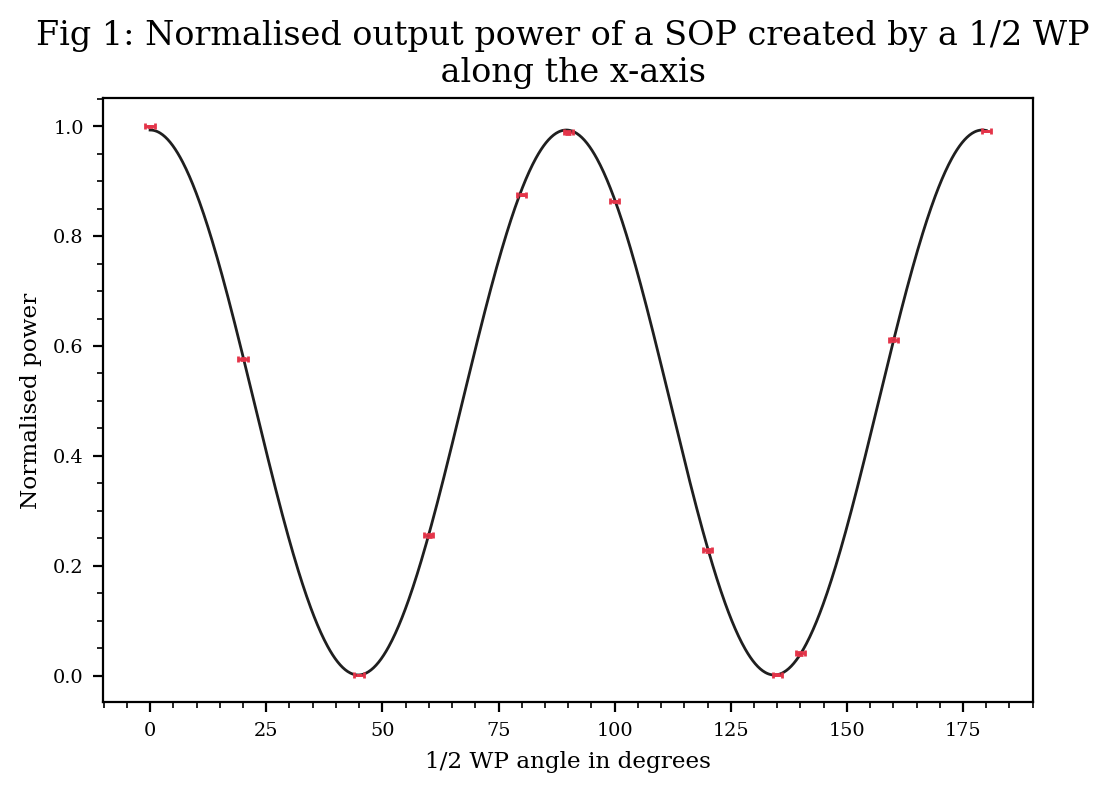

In [13]:
#define general cos^2 to fit data

def cos_sq_function(x, A, k, p, c):
    "general cos^2 function of the form y = A*cos^2(k*x + p) + c"
        # A is the amplitude, k is the multiplying coefficient inside the cosine term, p is the phase offset and c is the y-offset
        # x is the independent variable, y is the dependant variable
    X = np.radians(k*x + p) #we need x in radians here
    return A*(np.cos(X))**2 + c
    
# use scipy.optimize.curve_fit function to fit the cos^2 function to our data
# choice of initial guesses
    # A is amplitude so should be 1, k should be 1 and c, p chould be 0

popt, pcov = optimize.curve_fit(cos_sq_function, angle, norm_power, p0 = [1, 2, 0, 0], sigma = norm_error)

fitted_A, fitted_k, fitted_p, fitted_c = popt                       #naming fitted parameters
err_A,    err_k,    err_p,    err_c    = np.sqrt(np.diagonal(pcov)) #naming associated errors 

print('fit function is then y = {0:.3f} pm {4:.1g} * cos^2 (({1:.3f} pm {5:.1g}) * x + ({2:.1f} pm {6:.1g})) + ({3:.5f} pm {7:.1g})'.format(fitted_A, fitted_k, fitted_p, fitted_c, err_A, err_k, err_p, err_c))

x=np.linspace(0, 180, 1000)
plt.plot(x, cos_sq_function(x, fitted_A, fitted_k, fitted_p, fitted_c))
plt.errorbar(angle, norm_power, yerr=norm_error, xerr=angle_err, fmt='none')      #plot number of counts against angles
plt.xlabel('1/2 WP angle in degrees')                                             #label x-axis
plt.ylabel('Normalised power')                                                    #label y-axis
plt.title('Fig 1: Normalised output power of a SOP created by a 1/2 WP \n along the x-axis')
plt.show()

This is a very good fit, and very close to what was expected. 

# Results

Finally, using the measurements in table 2 and normalising, we find the the power output of SOPs leaving a 1/2 WP at different angles and incident on an analyser aligned with the x-axis follows the $\cos^2$ function

$$N = (0.992 \pm 0.002) \times \cos^2[(2.010 \pm 0.005)\, \theta + (-0.1 \pm 0.5)] + (0.00105 \pm 0.00007)$$

to our data with a great accuracy; Note that $\theta$ is in degrees here.

These results are consistent with Malus' law: the initial SOP was shifted symetrically by the transmission axis of the 1/2 WP, and so is at twice the angle of the 1/2 WP from the x-axis. This means that it is incident to the transmission axis of the analyser at this angle. This is the angle inside the $\cos^2$ term in Malus' law, and so this is why we get $k=2$ here.

# Discussion

1/2 WPs are made out of birefringent material, which means the refractive index changes depending on the orientation of the components of the incoming SOP. This means one component of the light will be travelling faster than the other, creating a phase shift between the two. This is very similar to 1/4 WPs. 1/2 WPs are made such that the phase shift between the two components of the wave (parallel and perpendicular to the transmission axis) is $\pi$, ie there is a 1/2 wave difference between the two, which explains the name. The reason why the SOP gets shifted symmetrically comes from the symmetries of cosine, which describes the electric field, where we have $\cos(\theta - \pi) = -\cos(\theta)$.